# DATA SCIENCE AND TECHNOLOGIES ASSIGNMENT 1

# DATASET

***We are working on a dataset that holds more than 10K records of restaurants in Sydney in the year 2018. Every record contains information about the restaurants which includes basic details such as name, address and suburb to advanced information such as rating text and rating number. Our goal is to predict the success of these restaurants using various machine learning algorithms such as Linear Regression, K-Nearest Neighbors, Random Forest classifier and Support Vector Machine.***

# PART A - IMPORTING AND UNDERSTANDING DATA 

In [10]:
# In this part, we import the required libraries and the dataset and perform data manipulation to create graphs.

In [12]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [14]:
# exploring the files in our data directory

for direname, _ , filenames in os.walk("data"):
    for filename in filenames:
        print(os.path.join(direname, filename))

data/Pedestrian_Crashes.csv
data/sydney.geojson
data/zomato_df_final_data.csv
data/.ipynb_checkpoints/sydney-checkpoint.geojson


In [18]:
# loading the data

data_path = "data/Pedestrian_Crashes.csv"
df = pd.read_csv(data_path)
df.head(300)

,Crash ID,Crash Date,Crash Time,Severity,Crash Type,Pedestrians,Pedestrian Casualties,Reported Location,Location
0,1152106,23/01/2017,16:00,Injury,Struck pedestrian (On Road),1,1,RATCLIFFE CRESCENT (CHALLINOR -> CHALLINOR),"(-35.23191, 149.054575)"
1,1162345,23/05/2017,18:45,Injury,Struck pedestrian (On Road),1,1,CAPTAIN COOK/FRANKLIN INTERSECTION,"(-35.320601, 149.134962)"
2,1152674,05/09/2016,10:29,Injury,Struck pedestrian (Off Road),1,1,BORROWDALE STREET (NORFOLK -> BORROWDALE),"(-35.342443, 149.12875)"
3,1154539,03/03/2017,16:23,Injury,Struck pedestrian (On Road),1,1,BARRY/KINGSLEY INTERSECTION,"(-35.275373, 149.125049)"
4,1155513,15/02/2017,22:55,Property Damage Only,Struck pedestrian (On Road),1,0,HALLORAN CLOSE (BOWMAN -> HALLORAN),"(-35.24957, 149.070075)"
...,...,...,...,...,...,...,...,...,...
295,1206644,13/01/2018,22:42,Injury,Struck pedestrian (On Road),1,1,COOYONG/MORT INTERSECTION,"(-35.275857, 149.131061)"
296,1202309,26/02/2019,17:00,Injury,Struck pedestrian (On Road),1,1,EMU BANK (EASTERN VALLEY -> AIKMAN),"(-35.239669, 149.074159)"
297,1114863,14/07/2015,13:15,Injury,Struck pedestrian (Off Road),1,1,HALFORD CRESCENT (CHEWINGS -> KEARTLAND),"(-35.2343, 149.04684)"
298,1082228,19/03/2014,15:05,Property Damage Only,Struck pedestrian (On Road),1,0,MELROSE DRIVE (BOTANY -> HINDMARSH),"(-35.349037, 149.084251)"


## How many unique cuisines are served by Sydney restaurants?

In [1196]:
# creating a new 'cuisine' column named 'cuisine_list' using lambda to remove single quotes

df['cuisine_list'] = df['cuisine'].apply(lambda x:x.strip("[]").replace("'"," ").split(','))

# extracting each cuisine from the list of all_cuisines and using unique() to form a series containing all unique cuisines

all_cuisines = [cuisine.strip() for sublist in df['cuisine_list'] for cuisine in sublist]

unique_cuisines = pd.Series(all_cuisines).unique()
print(unique_cuisines)

['Hot Pot' 'Korean BBQ' 'BBQ' 'Korean' 'Cafe' 'Coffee and Tea' 'Salad'
 'Poké' 'Japanese' 'Modern Australian' 'Thai' 'Desserts' 'Cantonese'
 'Chinese' 'Yum Cha' 'Sushi' 'Ramen' 'Malaysian' 'Taiwanese' 'Seafood'
 'Asian' 'Italian' 'Steak' 'French' 'Singaporean' 'European' 'Mexican'
 'Bar Food' 'American' 'Burger' 'Lebanese' 'Bakery' 'Grill' 'Pizza'
 'Vietnamese' 'Cuban' 'Latin American' 'Irish' 'Healthy Food' 'Australian'
 'Fusion' 'Patisserie' 'Juices' 'Vegetarian' 'Japanese BBQ' 'Spanish'
 'Dumplings' 'Indonesian' 'Indian' 'Tapas' 'Turkish' 'Vegan' 'Shanghai'
 'Tea' 'Caribbean' 'Sandwich' 'Fast Food' 'Middle Eastern' 'German'
 'Mediterranean' 'Pho' 'Greek' 'Beverages' 'Kebab' 'Fish and Chips'
 'Moroccan' 'Pakistani' 'Sri Lankan' 'Pub Food' 'Contemporary' 'Teriyaki'
 'Meat Pie' 'British' 'Brasserie' 'Belgian' 'Austrian' 'Hungarian' 'Swiss'
 'Charcoal Chicken' 'Brazilian' 'African' 'Israeli' 'Sichuan'
 'Street Food' 'Portuguese' 'Crepes' 'Filipino' 'Arabian' 'Falafel'
 'Bangladeshi' 'Ne

In [1198]:
# counting unique cuisines and displaying the count

print(f"There are {len(unique_cuisines)} unique cuisines")

There are 134 unique cuisines


Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
                     ... 
Swiss                   1
Dutch                   1
Kiwi                    1
Syrian                  1
Ukrainian               1
Name: count, Length: 134, dtype: int64


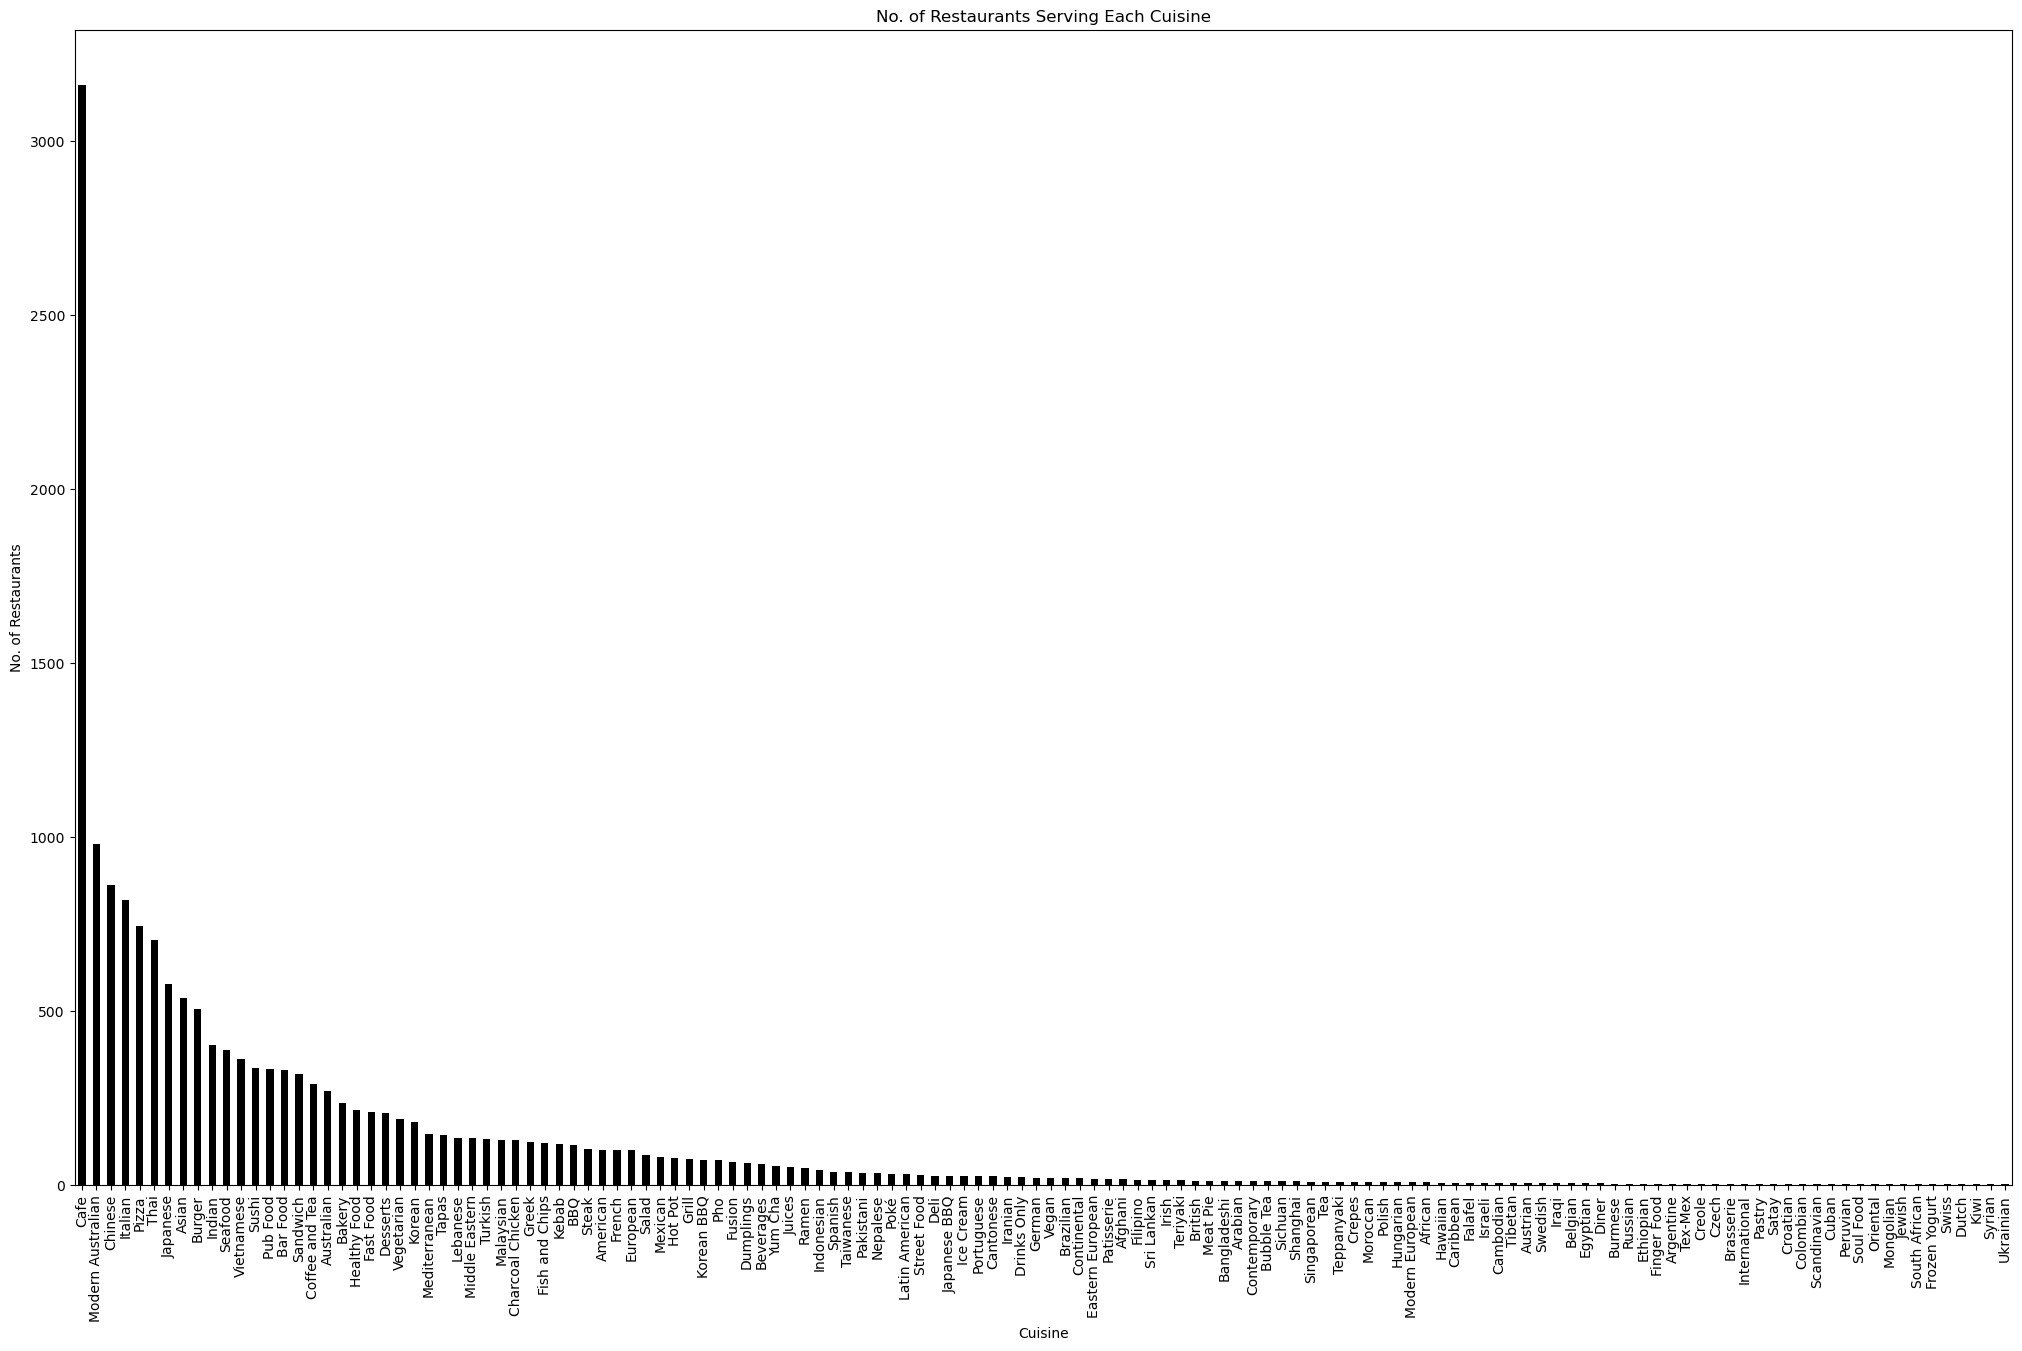

In [1200]:
# plotting the frequency of each cuisine 

cuisine_count = pd.Series(all_cuisines).value_counts() 
print(cuisine_count)

# creating a histogram to plot cuisine_count

plt.figure(figsize = (25, 15))
cuisine_count.plot(kind ='bar', color = 'black')
plt.title('No. of Restaurants Serving Each Cuisine')
plt.ylabel('No. of Restaurants')
plt.xlabel('Cuisine')
plt.xticks(rotation = 90)

# displaying the plot

plt.show()

## Which three suburbs have the highest number of restaurants?

The top three suburbs are:

subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64




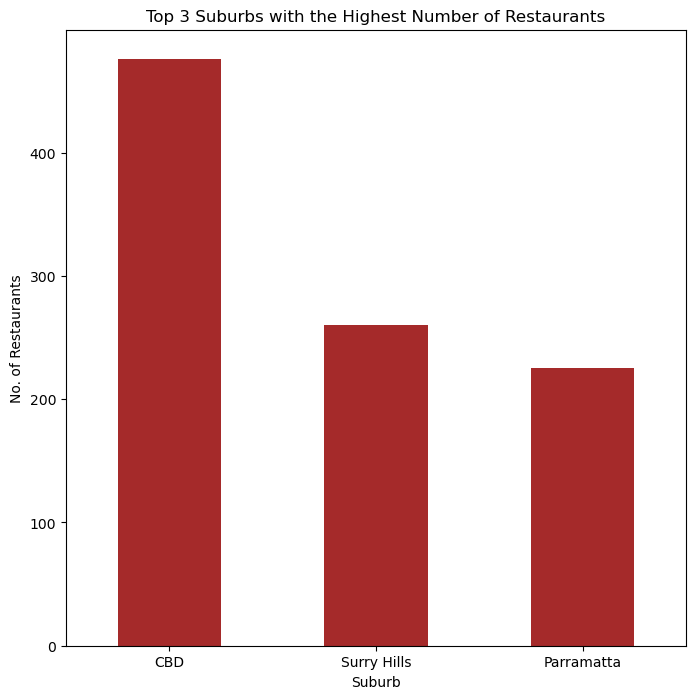

In [1202]:
# counting the number of restaurants in each suburb

restaurant_count = df['subzone'].value_counts()

# extracting the top 3 suburbs

top_3_suburbs = restaurant_count.head(3)
print(f"The top three suburbs are:\n")
print(top_3_suburbs)
print("\n")

# plotting the top 3 suburbs

plt.figure(figsize = (8, 8))
top_3_suburbs.plot(kind ='bar', color ='brown')
plt.title('Top 3 Suburbs with the Highest Number of Restaurants')
plt.ylabel('No. of Restaurants')
plt.xlabel('Suburb')
plt.xticks(rotation = 0)

# displaying the plot

plt.show()

## Restaurants with ‘Excellent’ ratings are mostly costly while those with ‘Poor’ratings are rarely expensive?? 

In [1206]:
# extracting the different rating_text values from 'rating_text' using unique()

print(df['rating_text'].unique())


['Very Good' 'Excellent' 'Good' 'Average' 'Poor' nan]


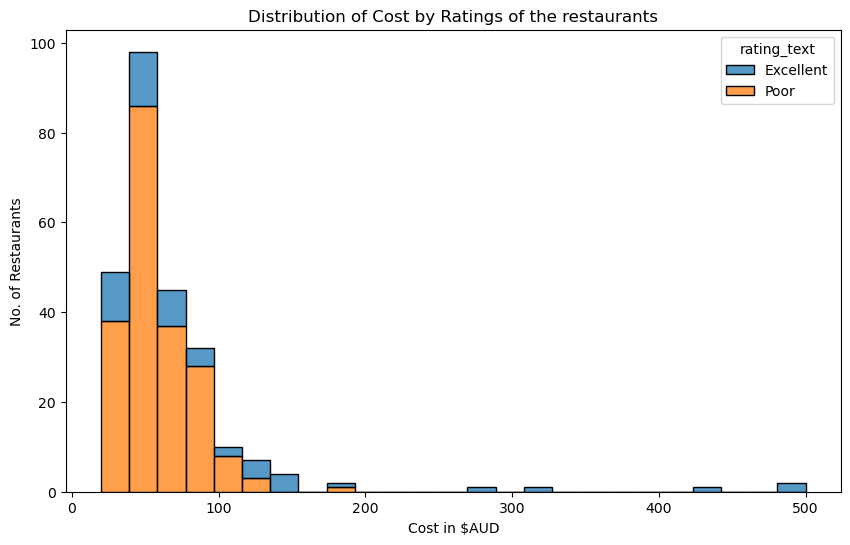

In [1208]:
# defining a condition using a lambda function to filter rows containing 'excellent' and 'poor' ratings and form a dataframe

filtered_rating_rows = df[df['rating_text'].apply(lambda x: x in ['Excellent', 'Poor'])]

# plotting the distribution of cost based on the ratings using histplot() in seaborn library and create a stacked bar graph

plt.figure(figsize = (10, 6))
sns.histplot(data = filtered_rating_rows, x ='cost', hue ='rating_text', multiple ='stack', bins=25)
plt.title('Distribution of Cost by Ratings of the restaurants')
plt.xlabel('Cost in $AUD')
plt.ylabel('No. of Restaurants')

# displaying the plot

plt.show()

## Statement

***While observing the stacked bar chart, we can conclude that a small fraction of restaurants with 'excellent' ratings are infact expensive and the rest of these restaurants share the same range of lower costs with restaurants with 'poor' ratings. Moreover, it is readily evident that most restaurants with poor ratings are inexpensive as their costs remains below 100 dollars. The restaurants in both categories also share costs between 100 dollars and 200 dollars which is moderately expensive.***


# EXPLORATORY ANALYSIS ON VARIABLES OF THE DATA

## Exploring numerical variables


In [1213]:
# finding numerical variables

numerical = [var for var in df.columns if df[var].dtype != 'O']

print(f"There are {len(numerical)} numerical variables\n")
print(f"The numerical variables are {numerical}")
print("\n")

df[numerical].head()

There are 7 numerical variables

The numerical variables are ['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']




,cost,lat,lng,rating_number,votes,groupon,cost_2
0,50.0,-33.876059,151.207605,4.0,1311.0,False,5.243902
1,80.0,-33.910999,151.193793,4.6,3236.0,False,7.560976
2,120.0,-33.867971,151.195210,4.9,1227.0,False,10.650407
3,270.0,-33.856784,151.215297,4.9,278.0,False,22.235772
4,55.0,-33.879035,151.206409,4.5,2150.0,False,5.630081


In [1215]:
# checking missing values in numerical variables

df[numerical].isnull().sum()

cost              346
lat               192
lng               192
rating_number    3316
votes            3316
groupon             0
cost_2            346
dtype: int64

In [1217]:
# viewing summary statistics of numerical variables

print(round(df[numerical].describe()), 2)

          cost      lat      lng  rating_number   votes   cost_2
count  10154.0  10308.0  10308.0         7184.0  7184.0  10154.0
mean      51.0    -33.0    148.0            3.0    84.0      5.0
std       28.0      8.0     27.0            0.0   175.0      2.0
min        8.0    -38.0   -123.0            2.0     4.0      2.0
25%       30.0    -34.0    151.0            3.0    12.0      4.0
50%       45.0    -34.0    151.0            3.0    32.0      5.0
75%       60.0    -34.0    151.0            4.0    87.0      6.0
max      500.0     52.0    153.0            5.0  3236.0     40.0 2


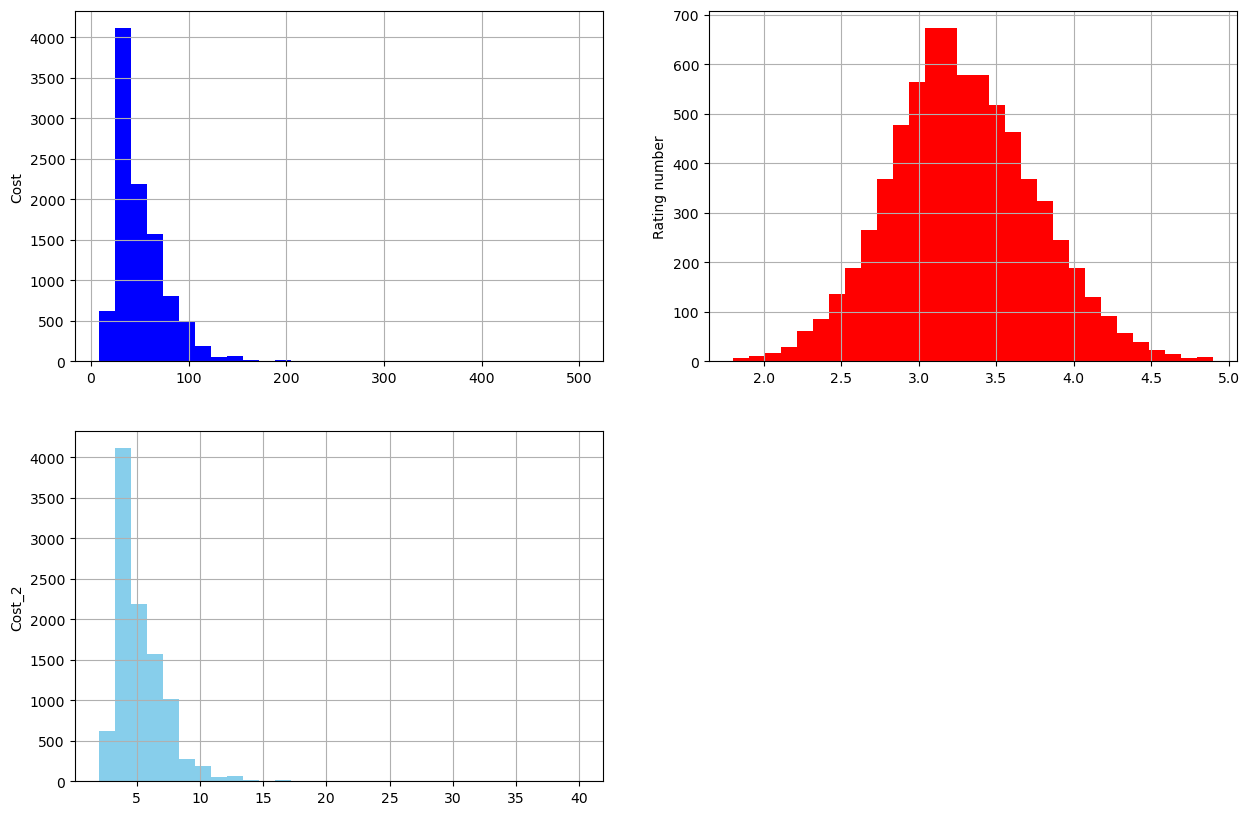

In [1219]:
# plotting histograms to visualise outliers in variables such as cost, cost_2 and rating_number

# plotting main plot

plt.figure(figsize=(15, 10))

# creating sub-plots for three variables

plt.subplot(2,2,1)
df['cost'].hist(bins = 30, color='blue')
plt.ylabel('Cost')
plt.xticks(rotation=0)

plt.subplot(2,2,2)
df['rating_number'].hist(bins = 30, color='red')
plt.ylabel('Rating number')
plt.xticks(rotation=0)

plt.subplot(2,2,3)
df['cost_2'].hist(bins = 30, color='skyblue')
plt.ylabel('Cost_2')
plt.xticks(rotation=0)

# displaying the plot

plt.show()

In [1221]:
# finding outliers in these variables

def find_outliers(variable, factor = 3, print_summary =True):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    Lower_boundary = df[variable].quantile(0.25) - (IQR * factor)
    Upper_boundary = df[variable].quantile(0.75) + (IQR * factor)
    
    outliers = []
    for index, val in enumerate(df[variable]):
        if val < Lower_boundary or val > Upper_boundary:
            outliers.append(index)
    
    
    if(print_summary):
        print('{variable} outliers are values < {lowerboundary} or > {upperboundary}'.format(variable= variable, lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
    return Lower_boundary, Upper_boundary, outliers
    

In [1223]:
# calling function find_outliers with the respective variables as parameters 

_,_,_ = find_outliers('cost')

_,_,_ = find_outliers('rating_number')

_,_,_ = find_outliers('cost_2')

cost outliers are values < -60.0 or > 150.0
rating_number outliers are values < 1.1999999999999997 or > 5.4
cost_2 outliers are values < -3.252032521 or > 12.967479676


## Exploring categorical variables

In [1226]:
# finding categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print(f"There are {len(categorical)} categorical variables\n")

print(f"The categorical variables are {categorical}")
print("\n")

df[categorical].head()

There are 11 categorical variables

The categorical variables are ['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color', 'cuisine_list']




,address,cuisine,link,phone,rating_text,subzone,title,type,color,cuisine_color,cuisine_list
0,"371A Pitt Street, CBD, Sydney","['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",https://www.zomato.com/sydney/sydney-madang-cbd,02 8318 0406,Very Good,CBD,Sydney Madang,['Casual Dining'],#e15307,#6f706b,"[ Hot Pot , Korean BBQ , BBQ , Korean ]"
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney","['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",https://www.zomato.com/sydney/the-grounds-of-a...,02 9699 2225,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],#9c3203,#6f706b,"[ Cafe , Coffee and Tea , Salad , Poké ]"
2,"Level G, The Darling at the Star, 80 Pyrmont ...",['Japanese'],https://www.zomato.com/sydney/sokyo-pyrmont,1800 700 700,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],#7f2704,#6f706b,[ Japanese ]
3,"Sydney Opera House, Bennelong Point, Circular...",['Modern Australian'],https://www.zomato.com/sydney/bennelong-restau...,02 9240 8000,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",#7f2704,#4186f4,[ Modern Australian ]
4,"20 Campbell Street, Chinatown, Sydney","['Thai', 'Salad']",https://www.zomato.com/sydney/chat-thai-chinatown,02 8317 4811,Excellent,Chinatown,Chat Thai,['Casual Dining'],#a83703,#6f706b,"[ Thai , Salad ]"


In [1228]:
# checking missing values in categorical variables

print(df[categorical].isnull().sum())

address             0
cuisine             0
link                0
phone               0
rating_text      3316
subzone             0
title               0
type               48
color               0
cuisine_color       0
cuisine_list        0
dtype: int64


In [1230]:
# getting the frequency counts of the categorical variables

for var in categorical:
    print(df[var].value_counts())

address
Level 5, Westfield Pitt Street Mall, 188 Pitt Street, CBD, Sydney           10
Lower Ground Floor, GPO Grand, 1 Martin Place, CBD, Sydney                   9
Bankstown Sports Club, 8 Greenfield Parade, Bankstown, Sydney                9
Tramsheds, 1 Dalgal Way, Forest Lodge, Sydney, Glebe, Sydney                 8
Level 1, Westfield Parramatta, 159-175 Church Street, Parramatta, Sydney     8
                                                                            ..
16 Belmore Road , Randwick                                                   1
86 Yarrara Road, Pennant Hills, Sydney                                       1
198 Mona Vale Road, St Ives, Sydney                                          1
66 Railway Crescent, Jannali, Sydney                                         1
136 Sailors Bay Road, Northbridge, Sydney                                    1
Name: count, Length: 9821, dtype: int64
cuisine
['Cafe']                                   1745
['Thai']                   

In [1232]:
# getting the percentages in each of the categorical variables

for var in categorical:
    print(df[var].value_counts() / df.shape[0])

address
Level 5, Westfield Pitt Street Mall, 188 Pitt Street, CBD, Sydney           0.000952
Lower Ground Floor, GPO Grand, 1 Martin Place, CBD, Sydney                  0.000857
Bankstown Sports Club, 8 Greenfield Parade, Bankstown, Sydney               0.000857
Tramsheds, 1 Dalgal Way, Forest Lodge, Sydney, Glebe, Sydney                0.000762
Level 1, Westfield Parramatta, 159-175 Church Street, Parramatta, Sydney    0.000762
                                                                              ...   
16 Belmore Road , Randwick                                                  0.000095
86 Yarrara Road, Pennant Hills, Sydney                                      0.000095
198 Mona Vale Road, St Ives, Sydney                                         0.000095
66 Railway Crescent, Jannali, Sydney                                        0.000095
136 Sailors Bay Road, Northbridge, Sydney                                   0.000095
Name: count, Length: 9821, dtype: float64
cuisine
['Cafe'

In [1234]:
# defining a function to explore each of the categorical variables

def explore_categorical(df, var):
    # check if the variable has any missing values
    print('**********Missing values**********')
    print(df[var].isnull().sum())
    print('**********Labels**********')
    # check unique lables in variable
    print(df[var].unique())
    print('**********Frequency**********')
    # check frequency of each variable
    print(df[var].value_counts())

In [1236]:
explore_categorical(df, 'cuisine')

**********Missing values**********
0
**********Labels**********
["['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']"
 "['Cafe', 'Coffee and Tea', 'Salad', 'Poké']" "['Japanese']" ...
 "['Bakery', 'Pizza', 'Kebab']" "['Cafe', 'Coffee and Tea', 'Chinese']"
 "['Kebab', 'Burger', 'Fish and Chips']"]
**********Frequency**********
cuisine
['Cafe']                                   1745
['Thai']                                    542
['Chinese']                                 450
['Modern Australian']                       346
['Indian']                                  286
                                           ... 
['Cafe', 'Spanish', 'Italian', 'Tapas']       1
['Desserts', 'Steak', 'Tapas']                1
['Pub Food', 'Burger', 'Pizza']               1
['Cambodian', 'Vietnamese']                   1
['Kebab', 'Burger', 'Fish and Chips']         1
Name: count, Length: 1759, dtype: int64


In [1238]:
explore_categorical(df, 'rating_text')

**********Missing values**********
3316
**********Labels**********
['Very Good' 'Excellent' 'Good' 'Average' 'Poor' nan]
**********Frequency**********
rating_text
Average      4501
Good         1917
Very Good     506
Poor          209
Excellent      51
Name: count, dtype: int64


In [1240]:
explore_categorical(df, 'subzone')

**********Missing values**********
0
**********Labels**********
['CBD' 'The Grounds of Alexandria, Alexandria' 'The Star, Pyrmont'
 'Circular Quay' 'Chinatown' 'Kensington Street, Chippendale'
 'Establishment, CBD' 'Surry Hills' 'The Rocks Centre, The Rocks '
 'Westfield Pitt Street Mall, CBD' 'The Rocks'
 'World Square Shopping Centre, CBD' 'Darling Park, Darling Harbour'
 'SkyView Shopping Plaza, CBD' 'Parramatta' 'Pyrmont'
 'Harbourside Shopping Centre, Darling Harbour' 'Ivy, CBD'
 'Regent Place Arcade, CBD' 'Newtown' 'The Galeries, CBD' 'Granville'
 'Potts Point' 'Woolloomooloo' 'Darling Harbour' 'Strathfield'
 'Darlinghurst' 'Wintergarden, CBD' 'Alexandria' 'Crows Nest'
 'Harbour Plaza, Chinatown' 'Westfield Chatswood, Chatswood' 'Ashfield'
 'Haberfield' 'Annandale' 'Chatswood' 'Chatswood Interchange, Chatswood'
 'The Strand Arcade, CBD' 'Glebe' 'Enmore' 'Redfern' 'Bronte'
 'Chippendale' 'Cabramatta' 'Rhodes' 'Icebergs, Bondi Beach' 'Bondi Beach'
 'Burwood' 'Macquarie Park' 'Erski

In [1242]:
explore_categorical(df, 'type')

**********Missing values**********
48
**********Labels**********
["['Casual Dining']" "['Café']" "['Fine Dining']" "['Fine Dining', 'Bar']"
 "['Casual Dining', 'Dessert Parlour']" "['Fine Dining', 'Wine Bar']"
 "['Casual Dining', 'Wine Bar']" "['Casual Dining', 'Bar']"
 "['Fast Food']" "['Café', 'Bakery']" "['Casual Dining', 'Café']"
 "['Bar']" "['Bakery', 'Dessert Parlour']" "['Bar', 'Wine Bar']"
 "['Food Court']" "['Dessert Parlour', 'Café']" "['Bar', 'Casual Dining']"
 "['Bakery', 'Pub']" "['Café', 'Casual Dining']" "['Café', 'Bar']"
 "['Casual Dining', 'Pub']" "['Bakery', 'Café']" "['Food Truck']"
 "['Café', 'Dessert Parlour']" "['Dessert Parlour']" "['Pub']" nan
 "['Pub', 'Casual Dining']" "['Dessert Parlour', 'Bakery']"
 "['Café', 'Wine Bar']" "['Pub', 'Wine Bar']"
 "['Food Court', 'Casual Dining']" "['Wine Bar', 'Casual Dining']"
 "['Casual Dining', 'Food Court']" "['Club', 'Bar']"
 "['Casual Dining', 'Bakery']" "['Bar', 'Pub']" "['Bar', 'Café']"
 "['Pub', 'Bar']" "['Beverage Sh

# Cuisine Density Map

In [1245]:
# We are creating a cuisine density map that colour-codes the suburbs serving the specific cuisine entered by the user in the local function 

#cuisine_density_map with the dataframe, cuisine name and geojson file as parameters.


In [1247]:
# importing geopandas library

import geopandas as gpd

geojson_file = 'data/sydney.geojson'  # path to geojson file

# defining a function with df, cuisine name and geojson file as parameters

def cuisine_density_map(df, cuisine, geojson_file):
    
    gdf_suburbs = gpd.read_file(geojson_file) # loading the file
    
    df_new = df[df['cuisine'].apply(lambda x: cuisine in x)] # filtering the dataframe based on the specific cuisine 

    # creating a geoDataFrame for restaurants with latitude and longitude points
    
    gdf_restaurants = gpd.GeoDataFrame(df_new,
                                       geometry=gpd.points_from_xy(df_new['lng'], df_new['lat']),
                                       crs=gdf_suburbs.crs)

    # spatial joining to join restaurants to suburbs based on whether the point lies within the suburb polygon
    
    gdf_joined = gpd.sjoin(gdf_restaurants, gdf_suburbs, how="left", predicate="within")
   
    # counting the number of restaurants per suburb for the specific cuisine
    
    suburb_counts = gdf_joined.groupby('SSC_NAME').size().reset_index(name='restaurant_count')

    # merging the counts with the suburbs geoDataFrame
    
    gdf_suburbs = gdf_suburbs.merge(suburb_counts, left_on='SSC_NAME', right_on='SSC_NAME', how='left')
    
    # ensuring 'restaurant_count' is treated as numeric
    
    gdf_suburbs['restaurant_count'] = pd.to_numeric(gdf_suburbs['restaurant_count'], errors='coerce')

    # filling NaN values with 0 (for suburbs with no restaurants of the selected cuisine)
    
    gdf_suburbs['restaurant_count'].fillna(0, inplace=True)

    # plotting the map with suburbs coloured by restaurant density
    
    plt.figure(figsize=(12, 8))
    gdf_suburbs.plot(column='restaurant_count', cmap='OrRd', legend=False,legend_kwds={'label': f'Number of {cuisine} Restaurants','orientation': 'horizontal'}, 
                     edgecolor='black', linewidth=0.5)

    # setting plot title and removing axis
    plt.title(f"Density of {cuisine} Restaurants in Sydney", fontsize=15)
    plt.axis('off')

    # displaying the plot
    
    plt.show()


/var/folders/m0/3pfr54dn19dbkm0ycn791kjm0000gn/T/ipykernel_6953/3913033759.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf_suburbs['restaurant_count'].fillna(0, inplace=True)


<Figure size 1200x800 with 0 Axes>

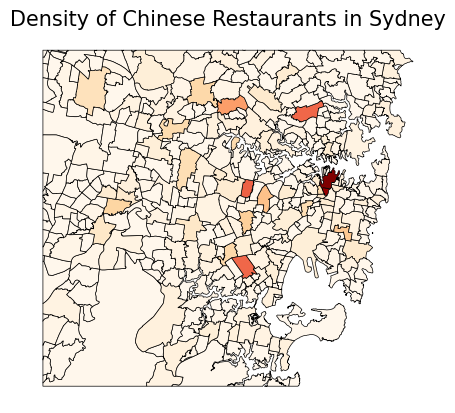

In [1249]:
# calling the function

cuisine_density_map(df, "Chinese", geojson_file)

# EMPLOYING INTERACTIVE LIBRARIES

## LIMITATIONS OF NON-INTERACTIVE PLOTTING

***There is a lack of real-time interaction with the plot while using plotting libraries like Matplotlib or Seaborn. The plots are static and the user is unable to zoom, pan or hover over data points for better understanding of the plots. The plots may be overcrowded with legends, labels and text annotations which leads to lack of detailed insights. In case of large datasets, data exploration using these libraries becomes harder as specific elements cannot be inspected clearly to find hidden patterns.***

## HOW DO INTERACTIVE LIBRARIES SOLVE THIS PROBLEM?

***Bokeh helps us to create interactive as well as visually-appealing plots that allow users to zoom, pan or selection specific data points. It also offers customized features that helps to change color palettes, fonts or any styling options according to the user's choice.***

***Plotly is another plotting library that creates over 40 different chart types ranging from simple line charts to complex 3D plots. Like Bokeh, it also offers interactive visualizations that are highly customizable.***

***Next is Cufflinks, a Python library that connects plotly and pandas which enables users to build graphs or plots directly on dataframes. Customization of chart titles, colors and axis labels can be widely performed on Cufflinks.***

In [1258]:
###TABLEAU DASHBOARD LINK GIVEN IN PDF FILE

# PART B - PREDICTIVE MODELLING

# FEATURE ENGINEERING


In [1262]:
# dropping irrelevant features

df = df.drop(['address','link','phone','cost_2','cuisine','rating_text','subzone','color','cuisine_color','lat','lng','groupon','title','votes'], axis =1)


In [1264]:
print(df)

# checking if any column has NaN values

nan_count = df.isna().sum()
print("Number of NaN values in each column:")
print(nan_count)

        cost  rating_number                    type  \
0       50.0            4.0       ['Casual Dining']   
1       80.0            4.6                ['Café']   
2      120.0            4.9         ['Fine Dining']   
3      270.0            4.9  ['Fine Dining', 'Bar']   
4       55.0            4.5       ['Casual Dining']   
...      ...            ...                     ...   
10495   40.0            NaN       ['Casual Dining']   
10496   20.0            NaN                 ['Bar']   
10497   20.0            NaN          ['Food Court']   
10498   15.0            NaN          ['Food Court']   
10499   60.0            NaN       ['Casual Dining']   

                                         cuisine_list  
0       [ Hot Pot ,   Korean BBQ ,   BBQ ,   Korean ]  
1      [ Cafe ,   Coffee and Tea ,   Salad ,   Poké ]  
2                                        [ Japanese ]  
3                               [ Modern Australian ]  
4                                  [ Thai ,   Salad ]  
...

In [1266]:
# filling missing values in the 'cost' with median value

col_median = df['cost'].median()
df['cost'].fillna(col_median, inplace = True)  # Fill with mean

/var/folders/m0/3pfr54dn19dbkm0ycn791kjm0000gn/T/ipykernel_6953/4107755502.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cost'].fillna(col_median, inplace = True)  # Fill with mean


In [1268]:
# filling missing values of 'rating number' with median value

col_median = df['rating_number'].median()
df['rating_number'].fillna(col_median, inplace =True)

/var/folders/m0/3pfr54dn19dbkm0ycn791kjm0000gn/T/ipykernel_6953/931123893.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating_number'].fillna(col_median, inplace =True)


In [1270]:
col_mode = df['type'].mode().iloc[0]
df['type'].fillna(col_mode, inplace = True)

/var/folders/m0/3pfr54dn19dbkm0ycn791kjm0000gn/T/ipykernel_6953/291749172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].fillna(col_mode, inplace = True)


In [1272]:
nan_count = df.isna().sum()
print("Number of NaN values in each column:")
print(nan_count)

Number of NaN values in each column:
cost             0
rating_number    0
type             0
cuisine_list     0
dtype: int64


In [1274]:
# One-hot encoding the 'cuisine_list' and 'type' in the training set

one_hot_encoded_df1 = df['cuisine_list'].apply(lambda x: pd.Series(1, index=x)).fillna(0)

# using lambda function to remove single quotes in 'type'

df['type'] = df['type'].apply(lambda x:x.strip('[]').replace("'"," ").split(","))
one_hot_encoded_df2 = df['type'].apply(lambda x: pd.Series(1, index=x)).fillna(0)

# Combine the one-hot encoded dataFrame with the original dataFrame, df

# rsuffixes to avoid column conflicts

df = df.join(one_hot_encoded_df1, rsuffix = '_cuisine')
df = df.join(one_hot_encoded_df2, rsuffix = '_type')

# dropping the columns cuisine_list and type as the encoded columns are already there

df = df.drop(columns=['cuisine_list','type'])

print(df)

        cost  rating_number   Hot Pot     Korean BBQ     BBQ     Korean   \
0       50.0            4.0        1.0            1.0     1.0        1.0   
1       80.0            4.6        0.0            0.0     0.0        0.0   
2      120.0            4.9        0.0            0.0     0.0        0.0   
3      270.0            4.9        0.0            0.0     0.0        0.0   
4       55.0            4.5        0.0            0.0     0.0        0.0   
...      ...            ...        ...            ...     ...        ...   
10495   40.0            3.3        0.0            0.0     0.0        0.0   
10496   20.0            3.3        0.0            0.0     0.0        0.0   
10497   20.0            3.3        0.0            0.0     0.0        0.0   
10498   15.0            3.3        0.0            0.0     0.0        0.0   
10499   60.0            3.3        0.0            0.0     0.0        0.0   

        Cafe     Coffee and Tea     Salad     Poké   ...    Food Court   \
0         0.

In [1275]:
# splitting X and y into training and testing sets

X = df.drop(['rating_number'], axis=1) #source variables

y = df['rating_number'] #target variable

from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8400, 272) (8400,)
(2100, 272) (2100,)


In [1276]:
X_train.dtypes

cost                float64
 Hot Pot            float64
  Korean BBQ        float64
  BBQ               float64
  Korean            float64
                     ...   
  Club              float64
  Beverage Shop     float64
  Food Stall        float64
  Food Truck        float64
 Food Stall         float64
Length: 272, dtype: object

In [1277]:
# displaying numerical variables

numericals = [var for var in X_train.columns if X_train[var].dtypes != 'O']
numericals

['cost',
 ' Hot Pot ',
 '  Korean BBQ ',
 '  BBQ ',
 '  Korean ',
 ' Cafe ',
 '  Coffee and Tea ',
 '  Salad ',
 '  Poké ',
 ' Japanese ',
 ' Modern Australian ',
 ' Thai ',
 ' Desserts ',
 '  Modern Australian ',
 ' Cantonese ',
 '  Chinese ',
 '  Yum Cha ',
 '  Sushi ',
 '  Ramen ',
 ' Malaysian ',
 ' Chinese ',
 '  Taiwanese ',
 ' Seafood ',
 '  Desserts ',
 '  Asian ',
 ' Italian ',
 '  Japanese ',
 ' Steak ',
 ' French ',
 ' Singaporean ',
 '  Malaysian ',
 '  Steak ',
 '  European ',
 ' Mexican ',
 '  Bar Food ',
 ' American ',
 '  Burger ',
 ' Lebanese ',
 '  Bakery ',
 ' Burger ',
 ' Grill ',
 '  Cafe ',
 '  Pizza ',
 ' Asian ',
 '  Vietnamese ',
 ' Bar Food ',
 ' Cuban ',
 '  Latin American ',
 ' Korean ',
 ' Bakery ',
 ' Irish ',
 '  Healthy Food ',
 ' Australian ',
 '  Seafood ',
 '  Fusion ',
 '  French ',
 '  Patisserie ',
 ' Juices ',
 '  Vegetarian ',
 '  Hot Pot ',
 ' Japanese BBQ ',
 ' Ramen ',
 ' Spanish ',
 ' Sushi ',
 '  Dumplings ',
 ' Patisserie ',
 '  Italian ',


In [1282]:
# percentage of missing values in each variable

round(X_train[numericals].isnull().mean(), 2)

cost                0.0
 Hot Pot            0.0
  Korean BBQ        0.0
  BBQ               0.0
  Korean            0.0
                   ... 
  Club              0.0
  Beverage Shop     0.0
  Food Stall        0.0
  Food Truck        0.0
 Food Stall         0.0
Length: 272, dtype: float64

In [1284]:
# display missing values

X_train[numericals].isnull().sum()

cost                0
 Hot Pot            0
  Korean BBQ        0
  BBQ               0
  Korean            0
                   ..
  Club              0
  Beverage Shop     0
  Food Stall        0
  Food Truck        0
 Food Stall         0
Length: 272, dtype: int64

In [1286]:
# check again missing values in numerical variables in X_train and y_train

X_train[numericals].isnull().sum()
y_train.isnull().sum()

0

In [1288]:
# checking missing values in numerical variables in X_test and y_test

X_test[numericals].isnull().sum()
y_test.isnull().sum()

nan_counts = df.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
cost                0
rating_number       0
 Hot Pot            0
  Korean BBQ        0
  BBQ               0
                   ..
  Club              0
  Beverage Shop     0
  Food Stall        0
  Food Truck        0
 Food Stall         0
Length: 273, dtype: int64


### Engineering outliers in numerical variables

In [1291]:
# Replace the outliers with some predefined the maximum value for each variable
def max_value(df_cuisine, variable, top):
    return np.where(df_cuisine[variable]>top, top, df_cuisine[variable])

cols_with_outliers = {'cost': 150 }

for df_cuisine in [X_train, X_test]:
    for col in cols_with_outliers:
        df_cuisine[col] = max_value(df_cuisine, col, cols_with_outliers[col])

In [1293]:
X_train.cost.max(), X_test.cost.max()

(150.0, 150.0)

In [1295]:
X_train.head()

,cost,Hot Pot,Korean BBQ,BBQ,Korean,Cafe,Coffee and Tea,Salad,Poké,Japanese,...,Food Court,Club,Beverage Shop,Fine Dining,Fast Food _type,Club,Beverage Shop,Food Stall,Food Truck,Food Stall
7816,25.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6456,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3943,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2293,45.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8012,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1297]:
X_test.head()

# checking again if there is any NaN values

nan_counts = df.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
cost                0
rating_number       0
 Hot Pot            0
  Korean BBQ        0
  BBQ               0
                   ..
  Club              0
  Beverage Shop     0
  Food Stall        0
  Food Truck        0
 Food Stall         0
Length: 273, dtype: int64


## Feature scaling

In [1300]:
# keeping the column names to get the dataframes back

cols = X_train.columns

from sklearn.preprocessing import MinMaxScaler

# initializing the MinMaxScaler

scaler = MinMaxScaler()

# fitting the scaler on the training and testing data

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# get the dataframes back

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

X_train.head()
X_test.head()



,cost,Hot Pot,Korean BBQ,BBQ,Korean,Cafe,Coffee and Tea,Salad,Poké,Japanese,...,Food Court,Club,Beverage Shop,Fine Dining,Fast Food _type,Club,Beverage Shop,Food Stall,Food Truck,Food Stall
0,0.154930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.119718,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.190141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.154930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.028169,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# REGRESSION

## REGRESSION MODEL 1

In [1304]:
# importing required libraries for linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [1306]:
# Create and fit the linear regression model

model_regression_1 = LinearRegression()
model_regression_1.fit(X_train, y_train)


LinearRegression()

In [1308]:
y_pred = model_regression_1.predict(X_test)


### MSE OF REGRESSION MODEL 1

In [1311]:
mse_1 = mean_squared_error(y_test, y_pred)
print(f"The Mean Square Error for Model Regression 1 is {mse_1}")

The Mean Square Error for Model Regression 1 is 1.3187727148303991e+23


## REGRESSION MODEL 2 USING LINEAR DESCENT

In [1314]:
# Linear regression prediction function

def pred(x, parameters):
    return np.dot(x, parameters["weight"]) + parameters["bias"]

In [1316]:
#  compute_cost function to find mse

def compute_cost(x, y, parameters):
    predictions = pred(x, parameters)
    mse = np.mean((predictions - y) ** 2)
    return mse

In [1318]:
# Gradient descent optimization for linear regression

def optimize(x, y, learning_rate, iterations, parameters):
    size = x.shape[0]
    
    for i in range(iterations):
        
        predictions = pred(x, parameters)
        
        # Compute gradients
        dW = (2 / size) * np.dot(x.T, (predictions - y))
        db = (2 / size) * np.sum(predictions - y)
        
        # Update parameters
        parameters["weight"] -= learning_rate * dW
        parameters["bias"] -= learning_rate * db 
        
        # Optionally print the cost every 100 iterations
        if i % 100 == 0:
            cost = compute_cost(x, y, parameters)
            print(f'Iteration {i}, Cost: {cost:.4f}')

    return parameters

In [1320]:
# defining function to train the regression model

def train_linear_regression(x, y, learning_rate, iterations):
    parameters_out = optimize(x, y, learning_rate, iterations, init_params)
    return parameters_out

In [1322]:
# initializing parameters

init_params = {}
init_params["weight"] = np.zeros(X_train.shape[1])
init_params["bias"] = 0

lr = 0.01  # Adjust the learning rate as needed
iters = 1000  # Number of iterations

In [1324]:
# training the linear regression model

linear_reg_params = train_linear_regression(X_train, y_train, learning_rate=lr, iterations=iters)


Iteration 0, Cost: 10.3022
Iteration 100, Cost: 0.2754
Iteration 200, Cost: 0.2148
Iteration 300, Cost: 0.1881
Iteration 400, Cost: 0.1715
Iteration 500, Cost: 0.1610
Iteration 600, Cost: 0.1544
Iteration 700, Cost: 0.1501
Iteration 800, Cost: 0.1472
Iteration 900, Cost: 0.1452


In [1325]:
# making predictions on the test data

y_pred = pred(X_test, linear_reg_params)

### MSE OF REGRESSION MODEL 2

In [1329]:
# computing MEAN SQUARE ERROR

mse_2 = mean_squared_error(y_test, y_pred)

print(f"The Mean Squared Error for Model Regression 2 is {mse_2:.4f}")

The Mean Squared Error for Model Regression 2 is 0.1311


## CLASSIFICATION MODEL 3

In [1332]:
# importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics


In [1334]:
df = pd.read_csv(data_path)
df.head(300)

# dropping irrelevant variables

df = df.drop(['address','link','phone','cuisine','cost_2','type','subzone','color','cuisine_color','lat','lng','type','groupon','title','votes'], axis =1)

# creating a new column that gives 0s to rows containing Poor and Average as values and 1s to other rating texts

df['binary_rating'] = df['rating_text'].apply(lambda x: 0 if x in ['Poor', 'Average'] else 1)


In [1336]:
# filling NaN values of 'cost' with median value

col_median = df['cost'].median()
df['cost'].fillna(col_median, inplace = True)


/var/folders/m0/3pfr54dn19dbkm0ycn791kjm0000gn/T/ipykernel_6953/4170850845.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cost'].fillna(col_median, inplace = True)


In [1338]:
# filling NaN values of 'rating_number' with median

col_median = df['rating_number'].median()# get it only from training
df['rating_number'].fillna(col_median, inplace =True)

/var/folders/m0/3pfr54dn19dbkm0ycn791kjm0000gn/T/ipykernel_6953/2305086989.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating_number'].fillna(col_median, inplace =True)


In [1340]:
# filling NaN values of 'rating_text' with mode

col_mode = df['rating_text'].mode().iloc[0]
df['rating_text'].fillna(col_mode)


0        Very Good
1        Excellent
2        Excellent
3        Excellent
4        Excellent
           ...    
10495      Average
10496      Average
10497      Average
10498      Average
10499      Average
Name: rating_text, Length: 10500, dtype: object

In [1342]:
# declaring source and target variables

X = df.drop(columns=['rating_text', 'binary_rating']) 
y = df['binary_rating']


In [1344]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [1346]:
# building the logistic regression model

model_classification_3 = LogisticRegression(max_iter = 100)
model_classification_3.fit(X_train, y_train)


LogisticRegression()

In [1348]:
# prediction on the test data

y_pred = model_classification_3.predict(X_test)

In [1350]:
# evaluation using confusion matrix and accuracy

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

### CLASSIFICATION MODEL 3 PERFORMANCE

In [1353]:
print(f"Accuracy: {accuracy}")
print(f"Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print(f"Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print(f"F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))
print("\n")
print(f"Confusion Matrix:\n {cm}")

Accuracy: 0.8685714285714285
Precision: 0.8804089888901357
Recall: 0.8685714285714285
F1-score: 0.8662401541221525


Confusion Matrix:
 [[ 721  237]
 [  39 1103]]


## CONFUSION MATRIX OF CLASSIFICATION MODEL 3

                 Predicted Poor&Avg  Predicted G&Vg&Ex
Actual Poor&Avg                1103                 39
Actual G&Vg&Ex                  237                721


<Axes: >

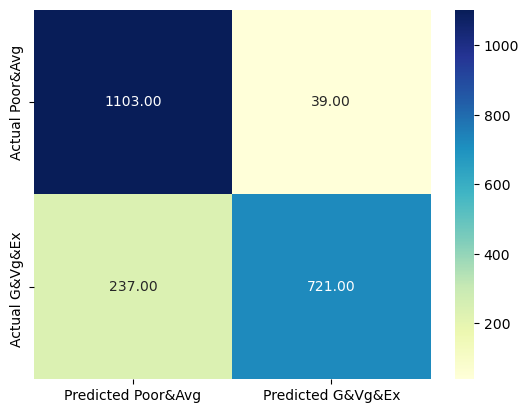

In [1356]:
# plotting confusion_matrix with seaborn heatmap

cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion_matrix = pd.DataFrame(cm, index =['Actual Poor&Avg','Actual G&Vg&Ex '], columns =['Predicted Poor&Avg','Predicted G&Vg&Ex'])
print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

## CONCLUSION

***The model correctly predicted 1103 instances of the class 'Poor,Average' as 0s while 721 instances of the class 'Good,Very Good and Excellent' was correctly predicted as 1s. Moreover, 237 instances of the class 'Poor,Average' was incorrectly predicted as 1s and 39 instances of the class 'Good,Very Good and Excellent' was incorrectly predicted as 0s. The model struggles with predicting the class with lower ratings accurately.***


# CLASSIFICATION USING THREE OTHER MODELS

## K-NEAREST NEIGHBORS CLASSIFIER

In [1362]:
# importing the KNN classifer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [1364]:
# initializing the KNN model with k=5

knn_model = KNeighborsClassifier(n_neighbors=10)

In [1366]:
# training the model

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [1368]:
# making predictions on the test data

y_pred_knn = knn_model.predict(X_test)

In [1370]:
# calculating accuracy and confusion matrix

accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

### KNN PERFORMANCE

In [1373]:
print(f"KNN Accuracy: {accuracy_knn}")
print(f"KNN Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print(f"KNN F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))
print("\n")
print(f"KNN Confusion Matrix:\n{cm_knn}")

KNN Accuracy: 0.9171428571428571
KNN Recall: 0.8685714285714285
KNN F1-score: 0.8662401541221525


KNN Confusion Matrix:
[[ 825  133]
 [  41 1101]]


## RANDOM FOREST CLASSIFIER

In [1376]:
# importing random forest classifer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [1378]:
# initializing the Random Forest model

rf_model = RandomForestClassifier(random_state=0)

In [1380]:
# training the model

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [1382]:
# making predictions on the test data

y_pred_rf = rf_model.predict(X_test)

In [1384]:
# calculating accuracy and confusion matrix

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

### RF PERFORMANCE

In [1387]:
print(f"RF Accuracy: {accuracy_rf}")
print(f"RF Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print(f"RF Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print(f"RF F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))
print("\n")
print(f"RF Confusion Matrix:\n{conf_matrix_rf}")

RF Accuracy: 0.9314285714285714
RF Precision: 0.8804089888901357
RF Recall: 0.8685714285714285
RF F1-score: 0.8662401541221525


RF Confusion Matrix:
[[ 819  139]
 [   5 1137]]


## SUPPORT VECTOR MACHINE CLASSIFIER

In [1390]:
# importing SVM classifier

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [1392]:
# initializing the SVM model

svm_model = SVC(C=1.0,kernel='linear', random_state=0)

In [1394]:
# training the model

svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [1395]:
# making predictions on the test data

y_pred_svm = svm_model.predict(X_test)

In [1396]:
# calculating accuracy and confusion matrix

accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

### SVM PERFORMANCE

In [1398]:
print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print(f"SVM Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print(f"SVM F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))
print("\n")
print(f"SVM Confusion Matrix:\n{cm_svm}")

SVM Accuracy: 0.8433333333333334
SVM Precision: 0.8804089888901357
SVM Recall: 0.8685714285714285
SVM F1-score: 0.8662401541221525


SVM Confusion Matrix:
[[ 629  329]
 [   0 1142]]


In [1399]:
from joblib import dump

dump(knn_model, 'knn_model.joblib')
dump(rf_model, 'rf_model.joblib')
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']